# Relevancy of amino acid content

In [1]:
import pandas as pd
import numpy as np
import pyrepseq as prs
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from src import *

sns.set_theme()
sns.set_style("ticks")

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['text.usetex'] = True
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['legend.fontsize'] = 20

Matplotlib is building the font cache; this may take a moment.
/Users/james/Documents/Projects/TCR-info 2022/paper_tcrinfo/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
olga = pd.read_csv('data/olga.csv.gz',sep=',').astype(str)
spc = pd.read_csv('data/spc.csv.gz',sep=',').astype(str)
epitope_meta = pd.read_csv('data/epitope_meta.csv.gz',sep=',')

In [3]:
def get_aa_content(sequence, aa):
    
    content = 0
    for amino_acid in sequence:
        if amino_acid == aa:
            content += 1
    return str(content)

In [4]:
aminoacids = 'ACDEFGHIKLMNPQRSTVWY'
three_letter_codes = ['Ala','Cys','Asp','Glu','Phe','Gly','His','Ile','Lys','Leu','Met','Asn','Pro','Gln','Arg','Ser','Thr','Val','Trp','Tyr']

In [5]:
for i, aminoacid in enumerate(aminoacids):
    olga[f'CDR3B_{three_letter_codes[i]}_content'] = olga['CDR3B'].apply(lambda x: get_aa_content(x, aminoacid))
    olga[f'CDR3A_{three_letter_codes[i]}_content'] = olga['CDR3A'].apply(lambda x: get_aa_content(x, aminoacid))
    spc[f'CDR3B_{three_letter_codes[i]}_content'] = spc['CDR3B'].apply(lambda x: get_aa_content(x, aminoacid))
    spc[f'CDR3A_{three_letter_codes[i]}_content'] = spc['CDR3A'].apply(lambda x: get_aa_content(x, aminoacid))

In [6]:
infos_alpha = []
infos_beta = []
infos_alpha_beta = []
for aminoacid in three_letter_codes:
    infos_alpha.append(prs.renyi2_entropy(olga, f'CDR3A_{aminoacid}_content') - prs.renyi2_entropy(spc, f'CDR3A_{aminoacid}_content', "Epitope"))
    infos_beta.append(prs.renyi2_entropy(olga, f'CDR3B_{aminoacid}_content') - prs.renyi2_entropy(spc, f'CDR3B_{aminoacid}_content', "Epitope"))
    infos_alpha_beta.append(prs.renyi2_entropy(olga, f'CDR3A_{aminoacid}_content') + prs.renyi2_entropy(olga, f'CDR3B_{aminoacid}_content') - prs.renyi2_entropy(spc, [f'CDR3A_{aminoacid}_content', f'CDR3B_{aminoacid}_content'], "Epitope"))
info_df = pd.DataFrame(index = three_letter_codes, columns = ['Alpha', 'Beta', 'Alpha_Beta'], data = np.array([infos_alpha, infos_beta, infos_alpha_beta]).T)

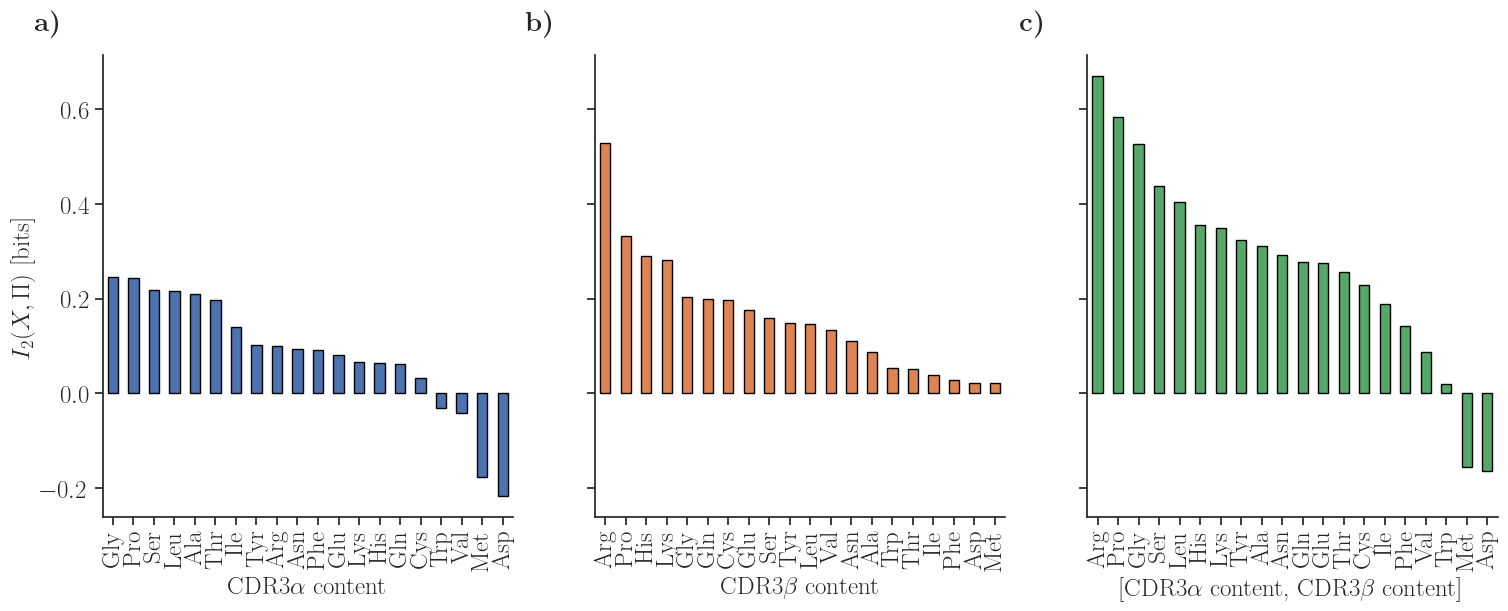

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

info_df['Alpha'].sort_values(ascending=False).plot(kind='bar', color='C0', ax=ax[0], edgecolor='black')
info_df['Beta'].sort_values(ascending=False).plot(kind='bar', color='C1', ax=ax[1], edgecolor='black')
info_df['Alpha_Beta'].sort_values(ascending=False).plot(kind='bar', color='C2', ax=ax[2], edgecolor='black')

ax[0].set_ylabel('$I_2(X, \Pi)$ [bits]')
ax[0].set_xlabel('CDR3$\\alpha$ content')
ax[1].set_xlabel('CDR3$\\beta$ content')
ax[2].set_xlabel('[CDR3$\\alpha$ content, CDR3$\\beta$ content]')

for i in range(3):
    ax[i].text(-0.1, 1.1, f'\\bf {chr(97+i)})', transform=ax[i].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')

plt.savefig('figures/figureS9.svg', bbox_inches='tight', dpi=500);